In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

import warnings
warnings.filterwarnings(action='ignore')

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('data/ex2data2.txt', header = None)
# or data = pd.read_csv(path, header=None, names=['test1','test2','accepted'])
X = data.iloc[:,:-1]*5.
y = data.iloc[:,2]
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
print(X.shape, y.shape)

(118, 2) (118,)


In [5]:
X

,0,1
0,0.256335,3.49780
1,-0.463710,3.42470
2,-1.068550,3.46125
3,-1.875000,2.51095
4,-2.566250,2.32820
...,...,...
113,-3.603100,2.69370
114,-2.969450,2.47440
115,-2.422250,4.99635
116,-0.031682,4.99635


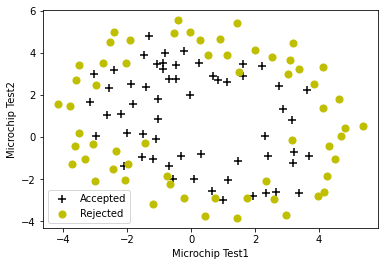

In [6]:
mask = y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values, s=50, c='k', marker='+',)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values, s=50, c='y', marker='o',)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Accepted', 'Rejected'))
plt.show()

In [7]:
model_0000 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer1'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer2'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer3'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer4'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])

model_0000.summary()

model_0001 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer1'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer2'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer3'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer4'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])

model_0011 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer1'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer2'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer3'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer4'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])

model_0111 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.00), name='relu_layer1'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer2'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer3'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer4'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])

model_1111 = keras.models.Sequential([
    keras.Input(shape=(2, )),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer1'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer2'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer3'),
    keras.layers.Dense(10, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01), name='relu_layer4'),
    keras.layers.Dense(1, activation='sigmoid', name='sigmoid_layer')
])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
relu_layer1 (Dense)          (None, 16)                48        
_________________________________________________________________
relu_layer2 (Dense)          (None, 10)                170       
_________________________________________________________________
relu_layer3 (Dense)          (None, 10)                110       
_________________________________________________________________
relu_layer4 (Dense)          (None, 10)                110       
_________________________________________________________________
sigmoid_layer (Dense)        (None, 1)                 11        
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_0000.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0001.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0011.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_0111.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_1111.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history_0 = model_0000.fit(X, y, epochs=3000, batch_size=118, verbose=0)
history_1 = model_0001.fit(X, y, epochs=3000, batch_size=118, verbose=0)
history_2 = model_0011.fit(X, y, epochs=3000, batch_size=118, verbose=0)
history_3 = model_0111.fit(X, y, epochs=3000, batch_size=118, verbose=0)
history_4 = model_1111.fit(X, y, epochs=3000, batch_size=118, verbose=0)

In [10]:
print("0000 : ", history_0.history['accuracy'][-7:])
print("0001 : ", history_1.history['accuracy'][-7:])
print("0011 : ", history_2.history['accuracy'][-7:])
print("0111 : ", history_3.history['accuracy'][-7:])
print("1111 : ", history_4.history['accuracy'][-7:])

0000 :  [0.9830508232116699, 0.9830508232116699, 0.9830508232116699, 0.9830508232116699, 0.9830508232116699, 0.991525411605835, 0.9830508232116699]
0001 :  [0.9661017060279846, 0.9576271176338196, 0.9661017060279846, 0.9661017060279846, 0.9661017060279846, 0.9576271176338196, 0.9576271176338196]
0011 :  [0.9661017060279846, 0.9661017060279846, 0.9661017060279846, 0.9576271176338196, 0.9576271176338196, 0.9576271176338196, 0.9576271176338196]
0111 :  [0.9237288236618042, 0.9237288236618042, 0.9237288236618042, 0.9237288236618042, 0.9237288236618042, 0.9237288236618042, 0.9237288236618042]
1111 :  [0.8559321761131287, 0.8559321761131287, 0.8559321761131287, 0.8559321761131287, 0.8559321761131287, 0.8559321761131287, 0.8559321761131287]


In [11]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:][0].min() - 2, X[:][0].max() + 2
    y_min, y_max = X[:][1].min() - 2, X[:][1].max() + 2
    h = 0.04
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])    # np.c_() : slice objects to concatenation along the second axis.
    Z = Z.reshape(xx.shape) < 0.5
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:][0], X[:][1], c=y, cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'Neural Network 0000')

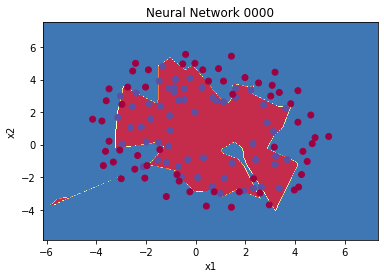

In [12]:
plot_decision_boundary(lambda x: model_0000.predict(x), X, y)
plt.title("Neural Network 0000")

Text(0.5, 1.0, 'Neural Network 0001')

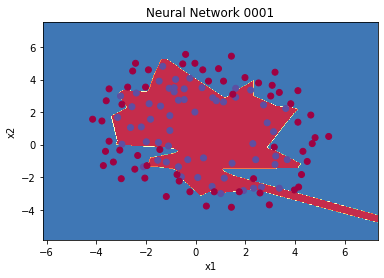

In [13]:
plot_decision_boundary(lambda x: model_0001.predict(x), X, y)
plt.title("Neural Network 0001")

Text(0.5, 1.0, 'Neural Network 0011')

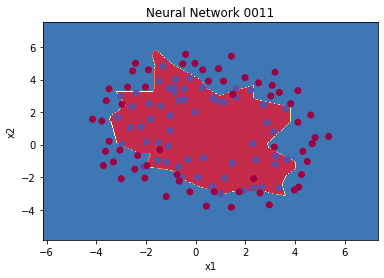

In [14]:
plot_decision_boundary(lambda x: model_0011.predict(x), X, y)
plt.title("Neural Network 0011")

Text(0.5, 1.0, 'Neural Network 0111')

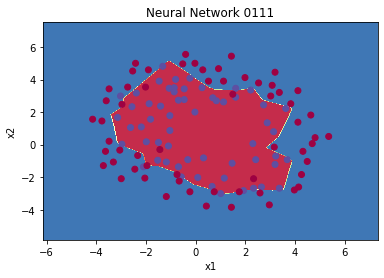

In [15]:
plot_decision_boundary(lambda x: model_0111.predict(x), X, y)
plt.title("Neural Network 0111")

Text(0.5, 1.0, 'Neural Network 1111')

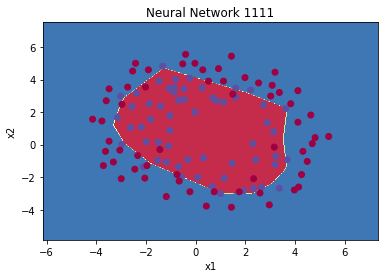

In [16]:
plot_decision_boundary(lambda x: model_1111.predict(x), X, y)
plt.title("Neural Network 1111")